<a href="https://colab.research.google.com/github/RadwaTareq/-Momentum-based-and-Vanilla-GD/blob/main/Momentum_based_and_Vanilla_GD_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariable Linear Regression Model Training Using Momentum-based and Vanilla GD with Batch/mini-Batch/Stochastic Variants:
## Please read and follow the instructions very carefully (Good Luck).
### In this task you should implement a mini-batch momentum based gradient descent optimizer to train a multivariable linear regression model.
### Your optimizer should be able to work as Stochastic/mini-batch/Batch by just adjusting mini-batch size without any code modification.
### Your optimizer should also work as GD without momentum by adjusting the hyperparameter value (think how?) without any code modification.
### Make your implementation as a function.
### The function should return the model hyperparameters and required output for plotting the learning curves.
### Data shuffle and adding the first bias feature (containig ones) must be berformed inside the function.
### The optimizer must be able to deal with any mini-batch size.
### Maximum number of epochs must be stated in order to avoid infinite loop.
### Gradient check and cost convergence check stop criterias must be implemented.
### You must plot the following learning curves:
#### - Loss vs. iterations (not Epoch).
#### - Loss vs. theta0, loss vs. theta1, loss vs. theta2.
### You must evaluate your model using r2_score metrics and achieve at least 0.8 score in any scenario of your choice and plot all the learning curves.
### You must run (at least) the following scenarios and show results and learning curves for each scenario (Do not do new implementation for each scenario. Use your implemenation and change input parameter values of the function):
#### - Momentum based with mini-batch size of your choice.
#### - Momentum based with Stochastic Gradient Descent.
#### - Momentum based with Batch Gradient Descent.
#### - Vanilla GD with mini-batch size of your choice.
#### - Vanilla GD with Stochastic Gradient Descent.
#### - Vanilla GD with Batch Gradient Descent.
#### - Any scenario with mini-batch size 32.
### You must use vectorize implementation. i.e., you should not have only two loops one for epochs and one for iterations (Only optimizer's loops).
### Your function should take the following inputs:
#### Input features, target label, learning rate, momentum term, mini-batch size, max number of epochs, gradient check tolerence, cost convergence check tolerence, and any other argument you think useful.
### The function should initialize the model parameters to zeros.
### Generate a regression data with two input features and 500 observations (You can see a sample code below for data generation. feel free to change any of the values to btain your own data to achieve the required score).

In [ ]:
import numpy as np
import pandas as pd

# Generate random data
np.random.seed(42)

# Create 500 records
n_samples = 500

# Independent variables (features)
x1 = np.random.uniform(low=2.0, high=5.0, size=n_samples)
x2 = np.random.uniform(low=4.0, high=8.0, size=n_samples)

# Dependent variable (target)
y = 1000 + 50 * x1 - 30 * x2 + np.random.normal(loc=0, scale=10, size=n_samples)

# Create a DataFrame
data = {
    'x1': x1,
    'x2': x2,
    'y': y
}

df = pd.DataFrame(data)

df.head()


,x1,x2,y
0,3.123620,6.792647,954.178622
1,4.852143,6.144385,1044.922138
2,4.195982,5.238110,1056.457756
3,3.795975,7.255180,978.249228
4,2.468056,6.738925,926.832960


# Your submission must be in .ipynb file format that contains all results and curves.
# Do not submit any link for a notebook.
# Do not forget to klick on Hand In after uploading your file.
# Good Luck

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
ones_column = np.ones_like(X.iloc[:,:-1])
x = np.column_stack((ones_column, X))




In [ ]:
def msb(X, y, alpha, epochs, batch_size,gama,cc,gc):
    theta = np.array([[0]
                      ,[0],
                      [0]])
    vt =  np.array([[0]
                      ,[0],
                      [0]])
    ones_column = np.ones_like(X.iloc[:,:-1])
    x = np.column_stack((ones_column, X))
    indices = np.arange(len(x))
    numbatches=len(y)//batch_size
    ey_predictl = []
    eploss = []
    theta_history = []
    epoch = 1
    for ep in range(epochs):
        np.random.shuffle(indices)
        xs = x[indices]
        ys = y[indices]
        for i in range(0,numbatches):
            theta_history.append(theta)
            xcur = xs[i:i + batch_size,:]
            ycur = ys[i:i + batch_size]
            y_predict = np.dot(xcur, theta)
            ey_predictl.append(y_predict)
            ycur=np.array(ycur)
            ycur=ycur.reshape(-1,1)
            errorvec = y_predict - ycur
            j = (1/(2*len(y)))*np.sum(errorvec**2)
            eploss.append(j)
            gradientvec=1/len(x) * np.dot(errorvec.T, xcur)
            gradientvecnorm=np.linalg.norm(gradientvec)
            gradientvec=gradientvec.reshape(-1,1)
            vt=(gama*vt)+(alpha*gradientvec)
            theta=theta-vt

        print(f"****************** Epoch {epoch} ********************")
        # print("\nh(x):",y_predict)
        # print("\nError Vector:\n",errorvec)
        print("\nj =", j)
        print("\nGradient Vector: \n",gradientvec)
        print("gradientvecnorm",gradientvecnorm)
        print("\ntheta_0_new",theta)
        epoch += 1
        if gradientvecnorm < gc or (ep >= 1 and np.absolute(eploss[-1] - eploss[-(numbatches+ 1)]) < cc):
            print("****************** Training Report ********************")
            print(f"\nit converged after {epoch} epochs")
            print("\ntheta_Opt:", theta)
            # print("\nError Vector:\n", errorvec)
            # print("\nCost:", j)
            # print("\nh(x) = y_predict:\n",y_predict)
            # print("\ny_actual:",y)
            break
    return theta_history, eploss, ey_predictl, theta
theta_history, eploss, ey_predictl, theta=msb(X, y, 0.05, 600, 32,0.5,0.01,0.001)

****************** Epoch 1 ********************

j = 1006.3473589708577

Gradient Vector: 
 [[-3.20344277]
 [-9.75101768]
 [-5.63494931]]
gradientvecnorm 11.708844737929155

theta_0_new [[ 23.5384618 ]
 [ 78.80845724]
 [123.22157579]]
****************** Epoch 2 ********************

j = 670.5649467857087

Gradient Vector: 
 [[-1.92064365]
 [-4.30662154]
 [-2.38442645]]
gradientvecnorm 5.284065730546504

theta_0_new [[ 25.44346168]
 [ 83.37582658]
 [118.81662079]]
****************** Epoch 3 ********************

j = 895.0759147076672

Gradient Vector: 
 [[-1.3450512 ]
 [-5.05983555]
 [ 4.88319053]]
gradientvecnorm 7.159374852333998

theta_0_new [[ 26.16990125]
 [ 86.22044276]
 [103.90533141]]
****************** Epoch 4 ********************

j = 553.8843459269185

Gradient Vector: 
 [[-0.33470303]
 [-0.40207559]
 [ 5.81299041]]
gradientvecnorm 5.8364842461795154

theta_0_new [[ 29.45879379]
 [ 93.58027516]
 [108.69132823]]
****************** Epoch 5 ********************

j = 864.59713537

Text(0, 0.5, '#loss')

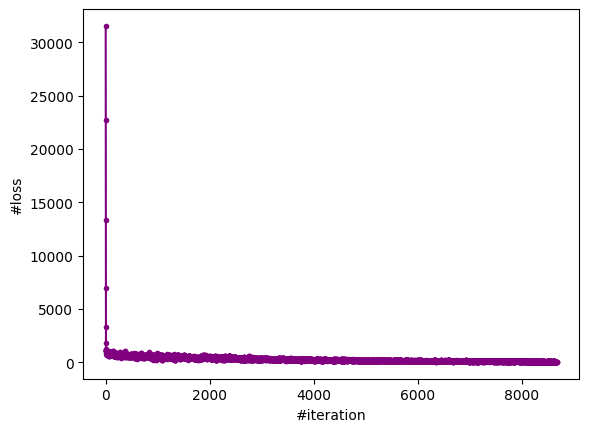

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
plt.plot(eploss,color="purple",marker=".")
plt.xlabel("#iteration")
plt.ylabel("#loss")

In [ ]:
def plott(x, y,value):
    plt.plot(x, y,marker="o",color='purple')
    match value:
        case 0:
            plt.xlabel("Theta 0")
            plt.ylabel("Loss")
        case 1:
            plt.xlabel("Theta 1")
            plt.ylabel("Loss")
        case 2:
            plt.xlabel("Theta 2")
            plt.ylabel("Loss")

In [ ]:
theta0=[list(y[0]) for y in theta_history ]
theta1=[list(y[1]) for y in theta_history ]
theta2=[list(y[2]) for y in theta_history ]

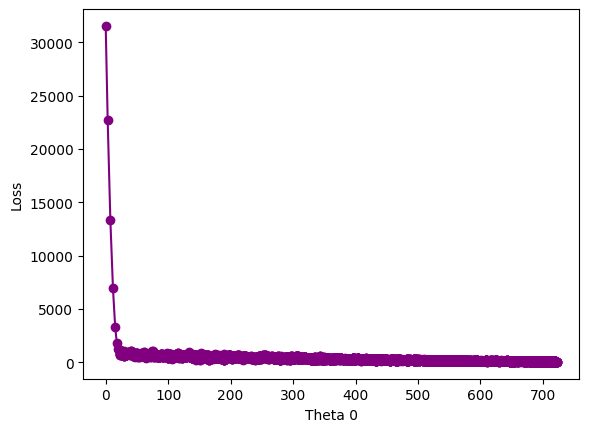

In [ ]:
plott(theta0,eploss,0)

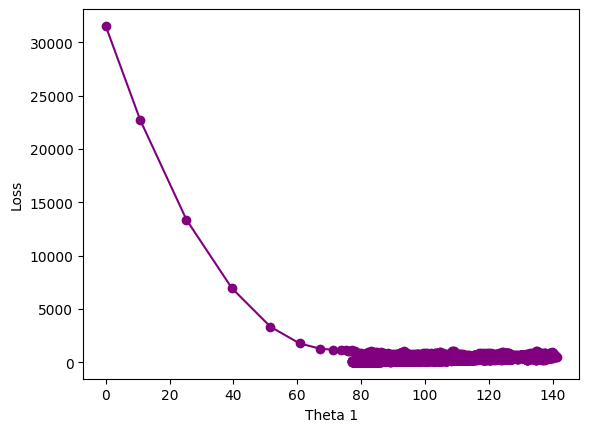

In [ ]:
plott(theta1,eploss,1)

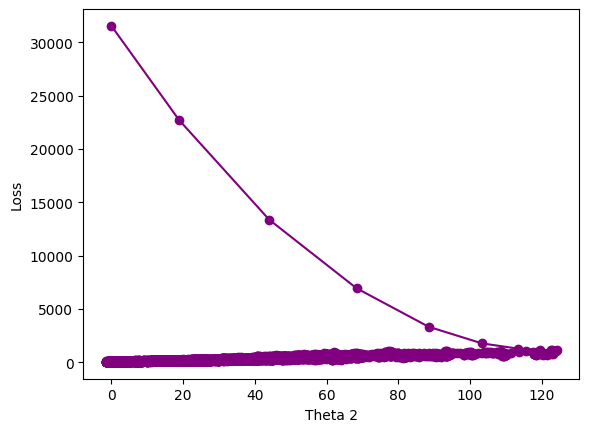

In [ ]:
plott(theta2,eploss,2)

In [ ]:
newyhat=np.dot(x, theta)
print("r2_score:",r2_score(y,newyhat))
newyhat

r2_score: 0.316271580642415


array([[ 977.56583756],
       [1112.28056225],
       [1059.37897997],
       [1031.0600115 ],
       [ 926.01526512],
       [ 922.81483214],
       [ 904.33268023],
       [1094.12197419],
       [1032.47079477],
       [1056.29140431],
       [ 893.68006924],
       [1116.08056183],
       [1086.85096379],
       [ 940.38998522],
       [ 928.1803353 ],
       [ 928.43701401],
       [ 959.04013746],
       [1013.63401583],
       [ 992.85547628],
       [ 954.59200941],
       [1032.82359423],
       [ 920.2640205 ],
       [ 959.8220424 ],
       [ 976.52046348],
       [ 997.62624186],
       [1072.8788622 ],
       [ 934.64581051],
       [1007.86903831],
       [1024.95482556],
       [ 901.30998976],
       [1033.14754852],
       [ 931.35910668],
       [ 906.49829636],
       [1111.96814255],
       [1117.21916771],
       [1081.26122724],
       [ 962.02299719],
       [ 909.59660751],
       [1048.99270781],
       [ 989.53787466],
       [ 919.65979037],
       [1005.416

In [ ]:
theta_history, eploss, ey_predictl, theta=msb(X, y, 0.05, 300, 1,0.5,0.01,0.001)

****************** Epoch 1 ********************

j = 0.6897988044273358

Gradient Vector: 
 [[0.05252804]
 [0.1458357 ]
 [0.33998843]]
gradientvecnorm 0.3736567708502344

theta_0_new [[ 21.81813194]
 [ 76.52911994]
 [113.07964699]]
****************** Epoch 2 ********************

j = 41.91469907832732

Gradient Vector: 
 [[-0.40946159]
 [-1.11601086]
 [-1.9441953 ]]
gradientvecnorm 2.2788230276716606

theta_0_new [[ 24.48331334]
 [ 83.21675342]
 [110.25607846]]
****************** Epoch 3 ********************

j = 18.958194520550446

Gradient Vector: 
 [[0.27537752]
 [1.00408189]
 [1.93890873]]
gradientvecnorm 2.200768106565166

theta_0_new [[ 27.08744561]
 [ 89.13418495]
 [107.52537267]]
****************** Epoch 4 ********************

j = 43.75013922604582

Gradient Vector: 
 [[-0.41833068]
 [-1.01246568]
 [-2.08912524]]
gradientvecnorm 2.3589259361192947

theta_0_new [[ 29.39487184]
 [ 93.70111369]
 [103.4921764 ]]
****************** Epoch 5 ********************

j = 0.04680437648233

In [ ]:
theta0=[list(y[0]) for y in theta_history ]
theta1=[list(y[1]) for y in theta_history ]
theta2=[list(y[2]) for y in theta_history ]

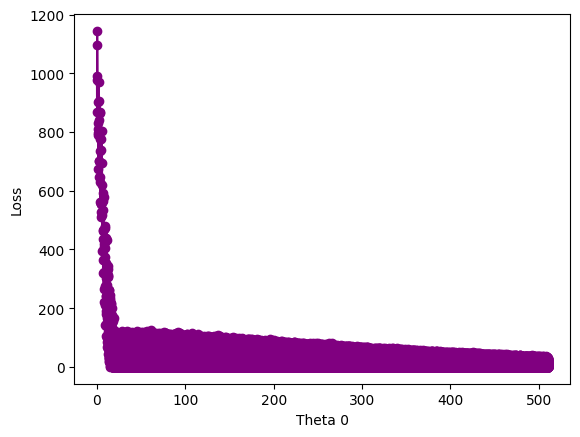

In [ ]:
plott(theta0,eploss,0)

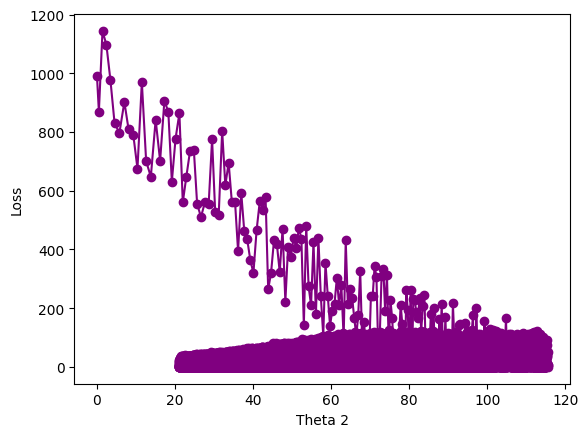

In [ ]:
plott(theta2,eploss,2)

In [ ]:
newyhat=np.dot(x, theta)
print("r2_score:",r2_score(y,newyhat))

r2_score: -0.8405515587017325


In [ ]:
theta_history, eploss, ey_predictl, theta=msb(X, y, 0.05, 300, 500,0.5,0.01,0.001)

****************** Epoch 1 ********************

j = 499695.50294693065

Gradient Vector: 
 [[ -998.11855771]
 [-3528.03617435]
 [-5878.25494691]]
gradientvecnorm 6927.998348991558

theta_0_new [[ 49.90592789]
 [176.40180872]
 [293.91274735]]
****************** Epoch 2 ********************

j = 1070247.7914739451

Gradient Vector: 
 [[1410.69017405]
 [5036.86410255]
 [8785.0864466 ]]
gradientvecnorm 10224.372383128773

theta_0_new [[ 4.32438313]
 [12.75950795]
 [ 1.61479869]]
****************** Epoch 3 ********************

j = 442649.3110514778

Gradient Vector: 
 [[ -939.61873962]
 [-3313.29761623]
 [-5529.24282472]]
gradientvecnorm 6514.088630368545

theta_0_new [[ 28.51454773]
 [ 96.60323838]
 [131.9279656 ]]
****************** Epoch 4 ********************

j = 29350.525678825157

Gradient Vector: 
 [[ 150.13382487]
 [ 564.69841623]
 [1101.08714388]]
gradientvecnorm 1246.5221077359677

theta_0_new [[ 33.10293878]
 [110.29018278]
 [142.03019186]]
****************** Epoch 5 *********

In [ ]:
theta0=[list(y[0]) for y in theta_history ]
theta1=[list(y[1]) for y in theta_history ]
theta2=[list(y[2]) for y in theta_history ]

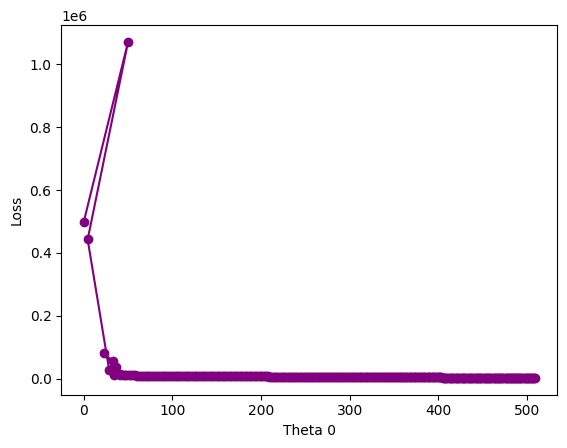

In [ ]:
plott(theta0,eploss,0)

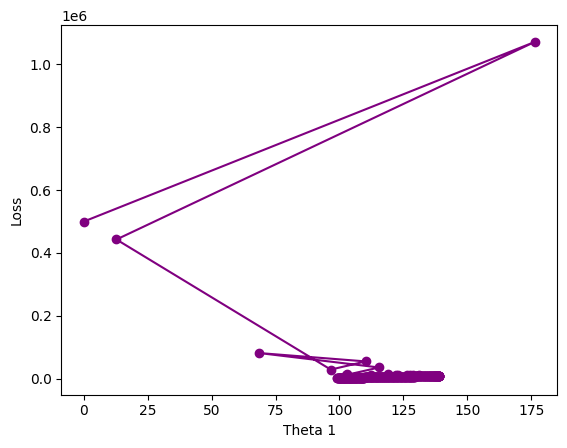

In [ ]:
plott(theta1,eploss,1)

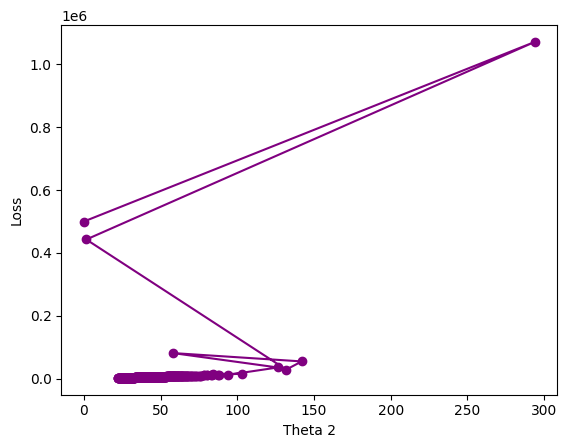

In [ ]:
plott(theta2,eploss,2)

In [ ]:
newyhat=np.dot(x, theta)
print("r2_score:",r2_score(y,newyhat))

r2_score: -0.8412066472958768
